# Distance and Area Filtering

In [2]:
day = # example: 'day0'
chip = # example: 'day0_ab1_cpp24'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_folder = '../../data/interim/'+day+'/'+chip
trimmed = pd.read_csv(data_folder+'_trimmed.csv',index_col=0)
figure_folder='../../figures/'+day+'/'+chip

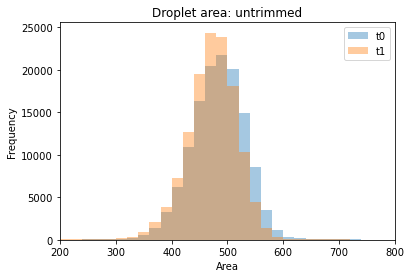

In [5]:
plt.hist(trimmed['t0_Area'],bins=50,range=(0,1000), label = 't0', alpha=0.4)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Droplet area: untrimmed')
plt.xlim(200,800)
plt.legend()
plt.savefig(figure_folder+'_droplet_area.png',bbox_inches='tight',dpi=300)

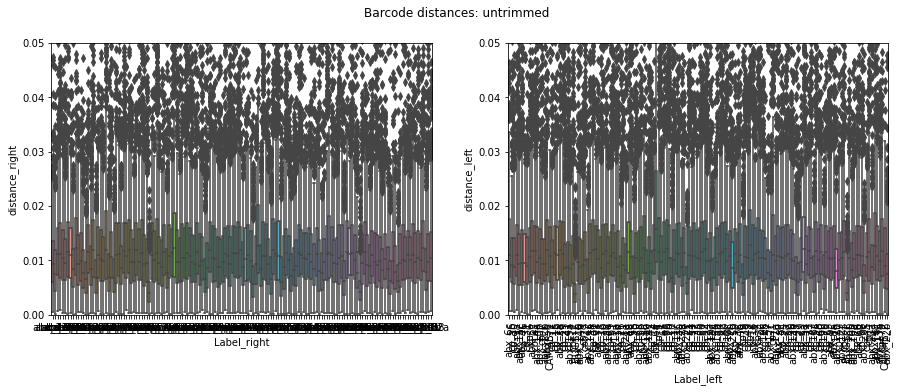

In [6]:
# To test barcode distances:
Ldist = trimmed[['Label_left','distance_left']]
Rdist = trimmed[['Label_right','distance_right']]

f, axes = plt.subplots(1, 2, figsize=(40,5))
sns.boxplot(x='Label_left',y='distance_left',data=Ldist, ax=axes[1])
sns.boxplot(x='Label_right',y='distance_right',data=Rdist, ax=axes[0])
for ax in f.axes:
    ax.tick_params(labelrotation=90)
ylim = [0.0,0.05]
plt.setp(axes, ylim=ylim)
f.suptitle('Barcode distances: untrimmed')
plt.savefig(figure_folder+'_barcode_distances.png',bbox_inches='tight',dpi=300)

In [7]:
Ldistance_trimmed = trimmed[trimmed['distance_left']<0.035]
distance_trimmed = Ldistance_trimmed[Ldistance_trimmed['distance_right']<0.035]
print("barcode untrimmed",trimmed.shape)
print("barcode trimmed",distance_trimmed.shape)

barcode untrimmed (131028, 365)
barcode trimmed (123457, 365)


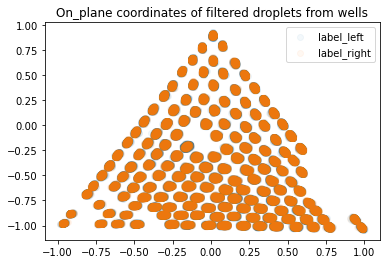

In [10]:
# Plots droplets onto the triangle, filtered
plt.scatter(distance_trimmed['PlaneX_left'],distance_trimmed['PlaneY_left'],alpha=0.05, label = 'label_left')
plt.scatter(distance_trimmed['PlaneX_right'],distance_trimmed['PlaneY_right'],alpha=0.05, label = 'label_right')
plt.gca().set_title('On_plane coordinates of filtered droplets from wells')
plt.legend()
plt.savefig(figure_folder+'_barcode_distance_trimmed_clusters.png',bbox_inches='tight',dpi=300)

In [11]:
d_area_trimmed = distance_trimmed[distance_trimmed['t0_Area']<650]
d_area_trimmed = d_area_trimmed[d_area_trimmed['t0_Area']>350]
print("area trimmed",d_area_trimmed.shape)

aread trimmed (122567, 365)


In [14]:
d_area_trimmed.to_csv(data_folder+'_qcfiltered.csv')

# Well locations

In [15]:
# Plot locations of all identified droplets on 2D plane to represent the chip
# Can identify portion of chip where droplet identification failed
# Regions may due to cross merging
pre_post = pd.read_csv(data_folder+'_pre_post.csv')
fig, axes = plt.subplots(2,1,figsize=(10,20))

axes[0].plot(pre_post['Pre_GlobalX'],-pre_post['Pre_GlobalY'],'.',ms=1)
axes[0].set_title('Wells Detected')
# axes[0].set_axis_off()

axes[1].plot(pre_post['Post_GlobalX'],-pre_post['Post_GlobalY'],'.',ms=1)
axes[1].set_title('Wells Detected - Edge Wells Removed')
# axes[1].set_axis_off()

plt.tight_layout()
plt.savefig(figure_folder+'_droplet_locations.png',bbox_inches='tight',dpi=300)

# Label Counts

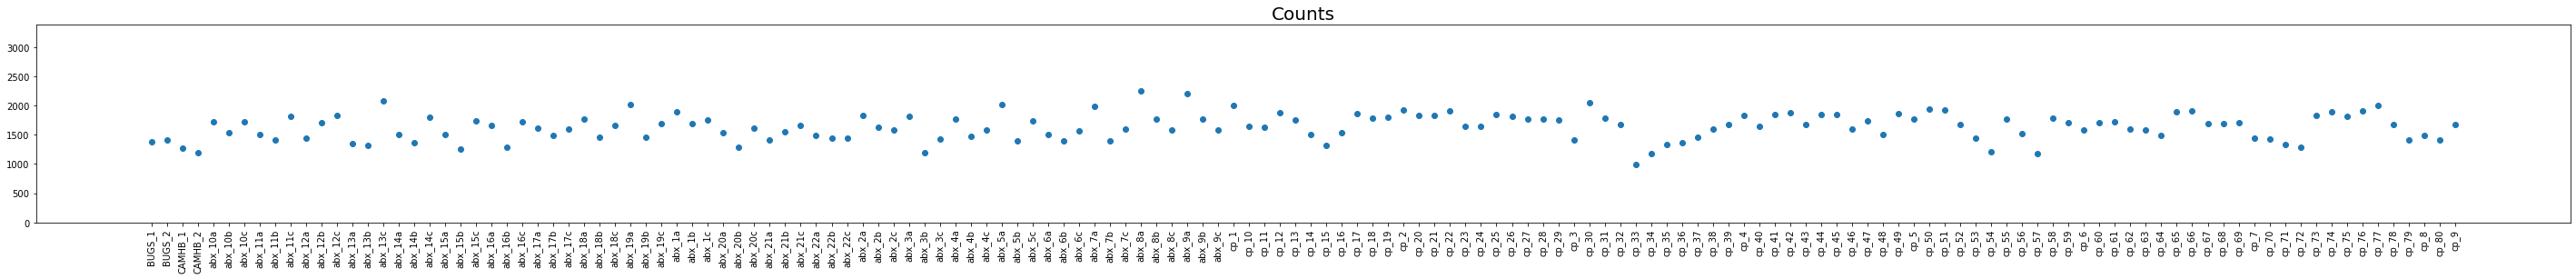

In [16]:
left_count = d_area_trimmed['Label_left'].value_counts()
right_count = d_area_trimmed['Label_right'].value_counts()
counts = left_count + right_count
# print(counts)

fig, axes = plt.subplots(1,1,figsize=(50,4))
axes.plot(counts.values,'o')
axes.set_xticks(range(len(counts.index.values)))
axes.set_xticklabels(counts.index.values,size=10,rotation=90)
plt.ylim(0, 1.5*max(counts))
axes.set_title('Counts',size=20)
plt.savefig(figure_folder+'_cluster_counts_postfilter.png',bbox_inches='tight',dpi=300)

# Check controls

In [18]:
bug_drops = d_area_trimmed[(d_area_trimmed.Label_left.str.contains('BUGS')) & \
(d_area_trimmed.Label_right.str.contains('BUGS'))]
bugmed_drops = d_area_trimmed[(d_area_trimmed.Label_left.str.contains('BUGS')) & \
(d_area_trimmed.Label_right.str.contains('CAMHB'))]
media_drops = d_area_trimmed[(d_area_trimmed.Label_left.str.contains('CAMHB')) & \
(d_area_trimmed.Label_right.str.contains('CAMHB'))]
plt.figure()
plt.hist(bug_drops.t0_norm2,label='BUGS')
plt.hist(bugmed_drops.t0_norm2,label='BUG+CAMHB')
plt.hist(media_drops.t0_norm2,label='CAMHB')
plt.title('Controls')
plt.legend(bbox_to_anchor=(1.25,1))
plt.savefig(figure_folder+'_control_distributions.png',bbox_inches='tight',dpi=300)

# of bug controls: 15
# of media controls: 13
